In [ ]:
import numpy as np
import torch
import tensorflow as tf
import psutil
import os
import gc
import time


ModuleNotFoundError: No module named 'memory_profiler'

In [ ]:
# Define a function to measure transposition time
def measure_transpose_speed(size, library='numpy'):
    total_time = 0
    if library == 'numpy':
        matrix = np.random.rand(size, size)
        _first_ele = matrix[-1, -1]
        for _ in range(50):
            start_time = time.time()
            transposed = matrix.T
            total_time += time.time() - start_time
    elif library == 'pytorch':
        matrix = torch.rand(size, size)
        _first_ele = matrix[-1, -1]
        for _ in range(50):
            start_time = time.time()
            transposed = matrix.t()
            total_time += time.time() - start_time
    elif library == 'tensorflow':
        matrix = tf.random.uniform((size, size))
        _first_ele = matrix[-1, -1]
        for _ in range(50):
            start_time = time.time()
            transposed = tf.transpose(matrix)
            # access = transposed[-1,-1]
            total_time += time.time() - start_time
            del transposed
            gc.collect()

    return total_time / 50

In [ ]:
# Experiment with different matrix sizes
sizes = [10, 10, 100, 500, 1000, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000]

numpy_times = []
pytorch_times = []
tensorflow_times = []

print("Matrix Transpose Speed Comparison")
print("Size\tNumpy (s)\tPyTorch (s)\tTensorFlow (s)")
measure_transpose_speed(1000, library='numpy')
measure_transpose_speed(1000, library='pytorch')
measure_transpose_speed(1000, library='tensorflow')
print("Running NumPy measurements...")
for size in sizes:
    numpy_time = measure_transpose_speed(size, 'numpy')
    numpy_times.append(numpy_time)

# PyTorch measurements
print("Running PyTorch measurements...")
for size in sizes:
    pytorch_time = measure_transpose_speed(size, 'pytorch')
    pytorch_times.append(pytorch_time)

# TensorFlow measurements
print("Running TensorFlow measurements...")
for size in sizes:
    tensorflow_time = measure_transpose_speed(size, 'tensorflow')
    tensorflow_times.append(tensorflow_time)

for i, size in enumerate(sizes):
    print(f"{size}\t{numpy_times[i]:.8f}\t{pytorch_times[i]:.8f}\t{tensorflow_times[i]:.8f}")

Matrix Transpose Speed Comparison
Size	Numpy (s)	PyTorch (s)	TensorFlow (s)
Running NumPy measurements...
Running PyTorch measurements...
Running TensorFlow measurements...
10	0.00000048	0.00000358	0.00054795
10	0.00000043	0.00000352	0.00049330
100	0.00000118	0.00000420	0.00073127
500	0.00000033	0.00000391	0.00133698
1000	0.00000030	0.00000347	0.00329767
2000	0.00000037	0.00000359	0.01133452
4000	0.00000035	0.00000222	0.06158816
6000	0.00000058	0.00000218	0.14177797
8000	0.00000058	0.00000238	0.24631983
10000	0.00000033	0.00000428	0.37461016
12000	0.00000037	0.00000351	0.56234414
14000	0.00000039	0.00000405	0.80575248
16000	0.00000062	0.00000448	1.28152388
18000	0.00000031	0.00000367	1.83643133
20000	0.00000038	0.00000242	2.24665489


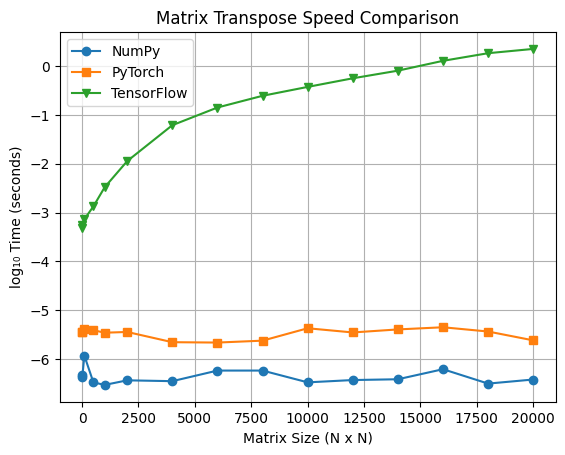

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(sizes, np.log10(numpy_times), label='NumPy', marker='o')
plt.plot(sizes, np.log10(pytorch_times), label='PyTorch', marker='s')
plt.plot(sizes, np.log10(tensorflow_times), label='TensorFlow', marker='v')
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('log₁₀ Time (seconds)')
plt.title('Matrix Transpose Speed Comparison')
plt.legend()
plt.grid()
plt.show()